In [2]:
# First let's import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'/Users/cango/Desktop/archive/TWO_CENTURIES_OF_UM_RACES.csv')

/var/folders/n6/5wgps2hx3rjbjs7w5dsrs9pc0000gn/T/ipykernel_6179/2933217361.py:21: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'/Users/cango/Desktop/archive/TWO_CENTURIES_OF_UM_RACES.csv')


# See the data that's been imported

In [3]:
df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


In [4]:
df.shape

(7461195, 13)

In [5]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

# clean up data

### Only want USA Races,50k or 50Mi,2020

#### step 1 show 50mi or 50km

In [6]:
df.columns = df.columns.str.strip()


In [7]:
print(df.columns)

Index(['Year of event', 'Event dates', 'Event name', 'Event distance/length',
       'Event number of finishers', 'Athlete performance', 'Athlete club',
       'Athlete country', 'Athlete year of birth', 'Athlete gender',
       'Athlete age category', 'Athlete average speed', 'Athlete ID'],
      dtype='object')


In [8]:
df[df['Event distance/length']=='50km']

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461089,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:19:56 h,*QLD,AUS,1956.0,F,W35,11541.0,1046326
7461090,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:28:57 h,*QLD,AUS,1954.0,M,M40,11154.0,1070007
7461091,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:46:39 h,*QLD,AUS,1951.0,M,M40,10466.0,345672
7461092,1995,07.01.1995,Centenary Lakes 50 Km Track Run (AUS),50km,6,4:47:39 h,*QLD,AUS,1939.0,M,M55,10429.0,1082443


#### combine 50k/50mi with isin

In [9]:
df[df['Event distance/length'].isin(['50km','50mi'])]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


In [10]:
df[(df['Event distance/length'].isin(['50km','50mi'])) & (df['Year of event']==2020)]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2538571,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:34:19 h,日本隊,JPN,1965.0,M,M50,10.627,53107
2538572,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,7:43:50 h,NaN,AUS,1974.0,M,M45,10.409,8785
2538573,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:04:40 h,NaN,TPE,1976.0,M,M40,9.962,4502
2538574,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:30:49 h,台灣大腳ㄚ長跑協會,TPE,1969.0,F,W50,9.452,63964
2538575,2020,07.-09.02.2020,Taipei 48hr Ultra Marathon - 50mi (TPE),50mi,38,8:34:47 h,NaN,TPE,1964.0,M,M55,9.379,4485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762404,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:25 h,AKS Polonia Warszawa,POL,1981.0,F,W35,6.573,860743
2762405,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:36:27 h,*Warszawa,POL,1970.0,F,W45,6.572,860744
2762406,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,7:44:18 h,Outdoor Training,POL,1993.0,F,W23,6.461,860745
2762407,2020,03.10.2020,Bison Ultra-Trail 50 (POL),50km,271,8:04:50 h,PH Bysewo Gdańsk,POL,1976.0,M,M40,6.188,798409


In [14]:
df[df['Event name'] == 'Everglades 50 Mile Ultra Run (USA)']['Event name'].str.split('(').str.get(1).str.split(')').str.get(0)


51923      USA
51924      USA
51925      USA
51926      USA
51927      USA
          ... 
6417091    USA
6417092    USA
6417093    USA
6417094    USA
6417095    USA
Name: Event name, Length: 338, dtype: object

In [11]:
df[df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0)=='USA']


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
55,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,9:53:05 h,"*Middleville, MI",USA,1983.0,M,M23,8.141,55
56,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:09:35 h,"*Waterloo, ON",CAN,1977.0,F,W40,7.211,56
57,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:33:00 h,"*Kitchener, ON",CAN,1976.0,M,M40,6.967,57
58,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:38:17 h,"*Utica, MI",USA,1986.0,M,M23,6.914,58
59,2018,06.01.2018,Yankee Springs 50 Mile Winter Challenge (USA),50mi,9,11:56:35 h,"*Grass Lake, MI",USA,1988.0,M,M23,6.738,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461181,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,11:59:37 h,NaN,USA,1941.0,M,M50,6709.0,1045603
7461182,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:01:41 h,NaN,USA,1932.0,M,M60,6690.0,1070463
7461183,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1934.0,F,W60,6674.0,416139
7461184,1995,07.01.1995,Avalon Benefit 50-Mile Run (USA),50mi,92,12:03:26 h,NaN,USA,1951.0,F,W40,6674.0,1098098


## Combine all the filter together

In [14]:
filtered_df = df[
    (df['Event distance/length'].isin(['50km', '50mi'])) & 
    (df['Year of event'] == 2020) & 
    (df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA')
]
filtered_df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281
2539950,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:42:06 h,"*Seattle, WA",USA,1985.0,F,W23,10.635,810282
2539951,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:49:20 h,"*Camano Island, WA",USA,1961.0,M,M55,10.369,11739
2539952,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:49:50 h,"*Clinton, WA",USA,1970.0,M,M45,10.351,80394
2539953,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:51:00 h,"*Seattle, WA",USA,1975.0,F,W40,10.309,140909
2539954,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,5:02:35 h,"*Sammamish, WA",USA,1979.0,M,M40,9.915,753889


In [15]:
df2=filtered_df

In [16]:
df2.shape

(26090, 13)

## Remove (USA) from event name

In [17]:
df2['Event name'].str.split('(').str.get(0)

2539945    West Seattle Beach Run - Winter Edition 
2539946    West Seattle Beach Run - Winter Edition 
2539947    West Seattle Beach Run - Winter Edition 
2539948    West Seattle Beach Run - Winter Edition 
2539949    West Seattle Beach Run - Winter Edition 
                             ...                   
2760957     Yankee Springs Fall Trail Run Festival 
2760958     Yankee Springs Fall Trail Run Festival 
2760959     Yankee Springs Fall Trail Run Festival 
2760960     Yankee Springs Fall Trail Run Festival 
2760961     Yankee Springs Fall Trail Run Festival 
Name: Event name, Length: 26090, dtype: object

In [18]:
df2['Event name']=df2['Event name'].str.split('(').str.get(0)

## Clean Up Athlete Age

In [19]:
df2['athlete_age']=2020-df2['Athlete year of birth']

## Remove h from athlete performance

In [22]:
df2['Athlete performance'].str.split(' ').str.get(0)

2539945    3:17:55
2539946    4:02:32
2539947    4:07:57
2539948    4:22:02
2539949    4:27:34
            ...   
2760957    7:07:48
2760958    7:27:22
2760959    7:27:24
2760960    7:38:30
2760961    7:59:53
Name: Athlete performance, Length: 26090, dtype: object

In [23]:
df2.head(5)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0


## Drop Columns: 
1. athlete Club,Athlete Country
 2. Athlete year of birth
 3. Athlete Age Category   

In [25]:
df2 = df2.drop(['Athlete club', 'Athlete country', 'Athlete age category'], axis=1)


In [26]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,1991.0,M,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,1981.0,M,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,1999.0,M,12.099,64838,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,1983.0,M,11.449,704450,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,1977.0,M,11.212,810281,43.0


## Clean up null values

In [28]:
df2.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete year of birth        233
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
athlete_age                  233
dtype: int64

In [29]:
df2[df2['athlete_age'].isna()==1]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2547794,2020,25.01.2020,North Carolina Fat Ass 50 Km,50km,57,6:10:30 h,NaN,M,8.097,811923,NaN
2551331,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,4:46:34 h,NaN,M,10.469,812656,NaN
2551336,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:08:36 h,NaN,M,9.721,812657,NaN
2551344,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:54:04 h,NaN,F,8.473,658221,NaN
2551348,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,6:07:11 h,NaN,M,8.17,812660,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2746543,2020,17.10.2020,Black River Trail Classic 50 Km,50km,8,8:31:26 h,NaN,F,5.866,857251,NaN
2749869,2020,17.10.2020,MuleSkinner Endurance 50 Mile Race,50mi,27,11:55:05 h,NaN,M,6.752,857957,NaN
2755985,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,9:03:25 h,NaN,M,8.885,859462,NaN
2755994,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,10:37:00 h,NaN,M,7.579,398583,NaN


In [30]:
df2=df2.dropna()

## check for dupes

In [31]:
df2[df2.duplicated()==True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,athlete_age


In [32]:
df2.reset_index(drop=True)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,1991.0,M,15.158,71287,29.0
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,1981.0,M,12.369,629508,39.0
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,1999.0,M,12.099,64838,21.0
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,1983.0,M,11.449,704450,37.0
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,1977.0,M,11.212,810281,43.0
...,...,...,...,...,...,...,...,...,...,...,...
25852,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48 h,1958.0,F,7.013,816361,62.0
25853,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22 h,1977.0,F,6.706,326469,43.0
25854,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24 h,1962.0,F,6.705,372174,58.0
25855,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30 h,1981.0,F,6.543,860349,39.0


# fix types

In [33]:
df2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete year of birth        float64
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
athlete_age                  float64
dtype: object

In [34]:
df2['athlete_age']=df2['athlete_age'].astype(int)

In [36]:
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)


In [38]:
df2.dtypes


Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete year of birth        float64
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
athlete_age                    int64
dtype: object

In [39]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete year of birth,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,1991.0,M,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,1981.0,M,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,1999.0,M,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,1983.0,M,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,1977.0,M,11.212,810281,43


# Rename columns

In [40]:
df2=df2.rename(columns={
    'Year of event':'year',
    'event dates':'race_day',
    'Event name':'race_name',
    'Event distance/length': 'race_length',
    'Event number of finishers': 'race_number_of_finishers',
    'Athlete performance': 'athlete_performance',
    'Athlete gender': 'athlete_gender',
    'Athlete average speed': 'athlete_average_speed',
    'Athlete ID': 'athlete_id'
})

In [70]:
df2.head()

,year,Event dates,race_name,race_length,race_number_of_finishers,athlete_performance,Athlete year of birth,athlete_gender,athlete_average_speed,athlete_id,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,1991.0,M,15.158,71287,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,1981.0,M,12.369,629508,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,1999.0,M,12.099,64838,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,1983.0,M,11.449,704450,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,1977.0,M,11.212,810281,43


## Find 2 races That I ran in 2020-Sarasota I Everglades

In [69]:
df2[df2['race_name']=='Everglades 50 Mile Ultra Run ']

,year,Event dates,race_name,race_length,race_number_of_finishers,athlete_performance,Athlete year of birth,athlete_gender,athlete_average_speed,athlete_id,athlete_age
2591476,2020,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,8:31:39 h,1993.0,M,9.436,820757,27
2591477,2020,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,8:31:48 h,1981.0,M,9.433,46432,39
2591478,2020,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,8:34:43 h,1986.0,M,9.380,813617,34
2591479,2020,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,9:07:35 h,1987.0,M,8.817,820758,33
2591480,2020,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,9:15:32 h,1990.0,M,8.691,647115,30
2591481,2020,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,9:18:05 h,1994.0,M,8.651,696063,26
2591482,2020,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,9:19:10 h,1997.0,M,8.634,222509,23
2591483,2020,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,9:20:51 h,1984.0,M,8.608,820759,36
2591484,2020,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,9:26:15 h,1994.0,F,8.526,359359,26
2591485,2020,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,9:26:16 h,1978.0,M,8.526,103020,42


In [44]:
df2[df2['athlete_id']==222509 ]

,year,Event dates,race_name,race_length,race_number_of_finishers,athlete_performance,Athlete year of birth,athlete_gender,athlete_average_speed,athlete_id,athlete_age
2591482,2020,14.03.2020,Everglades 50 Mile Ultra Run,50mi,40,9:19:10 h,1997.0,M,8.634,222509,23
2616900,2020,22.02.2020,Manasota Track Club 50K,50km,36,4:49:16 h,1997.0,M,10.371,222509,23


## CHARTS AND GRAPHS

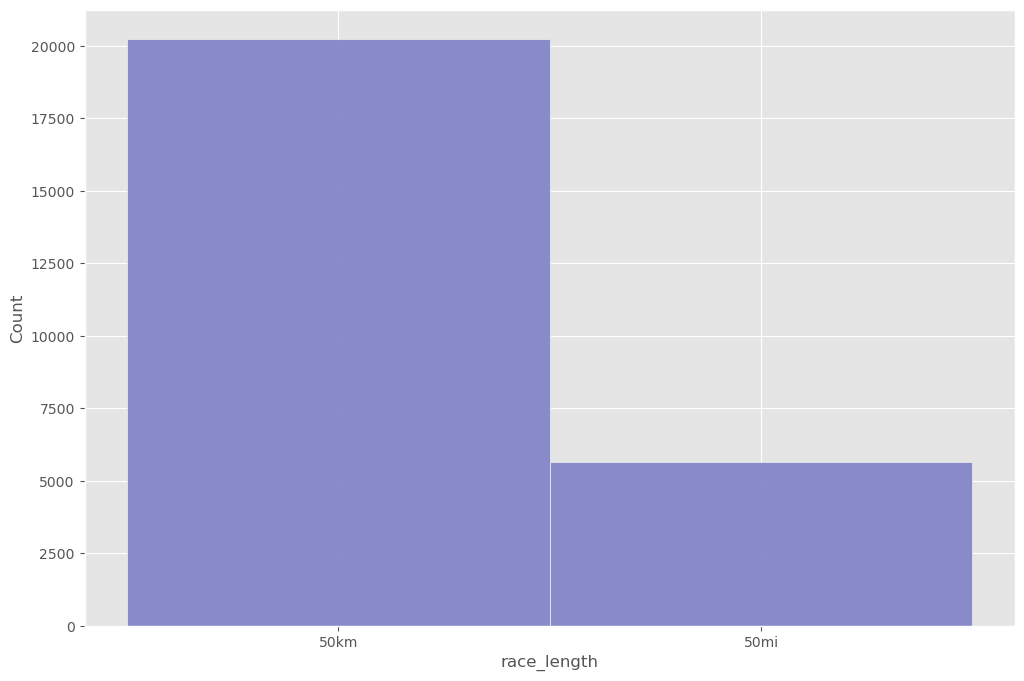

In [48]:
sns.histplot(df2['race_length'])
plt.show()

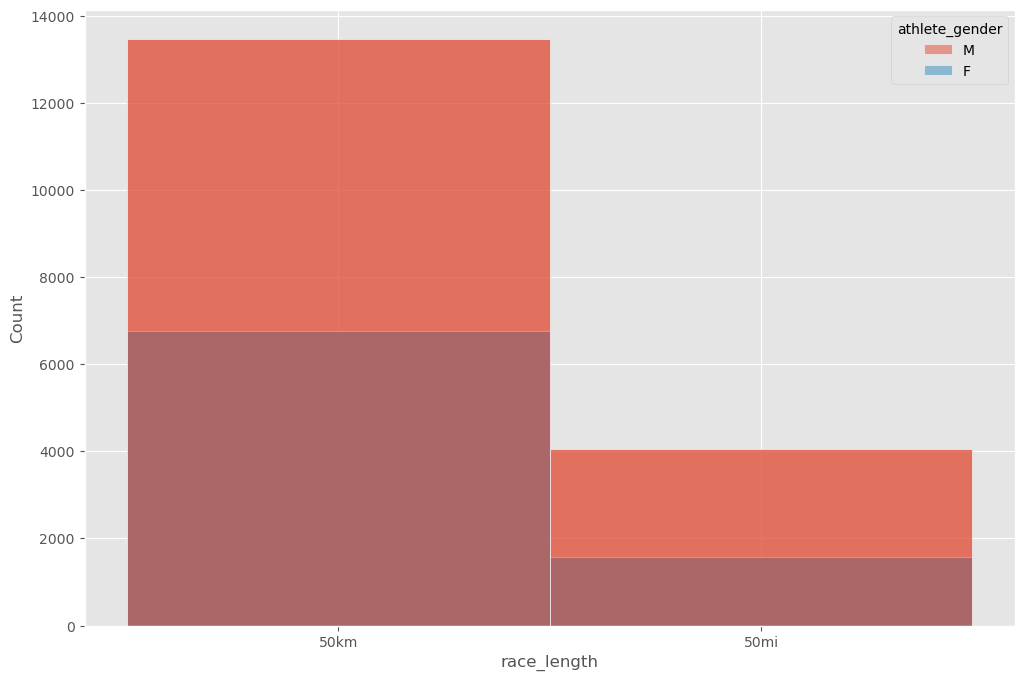

In [50]:
sns.histplot(df2,x='race_length',hue='athlete_gender')
plt.show()

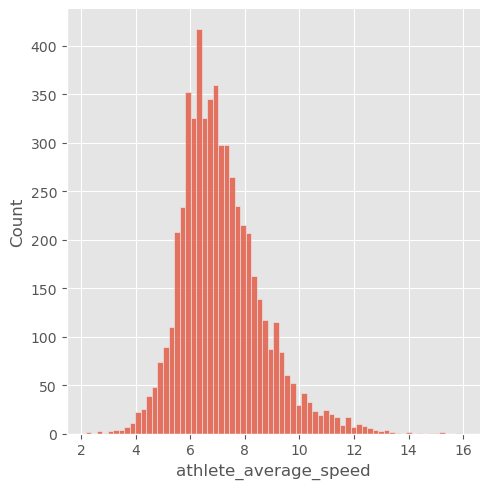

In [55]:
sns.displot(df2[df2['race_length'] == '50mi']['athlete_average_speed'], kde=False)
plt.show()


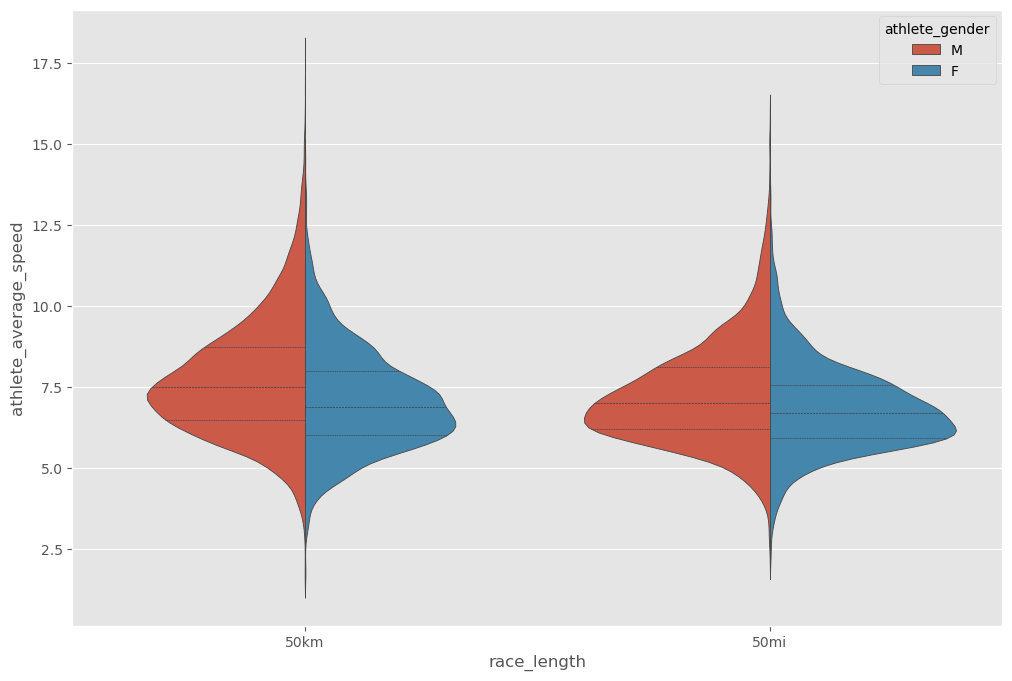

In [59]:
sns.violinplot(data=df2,x='race_length',y='athlete_average_speed',hue='athlete_gender',split=True,inner='quart')
plt.show()

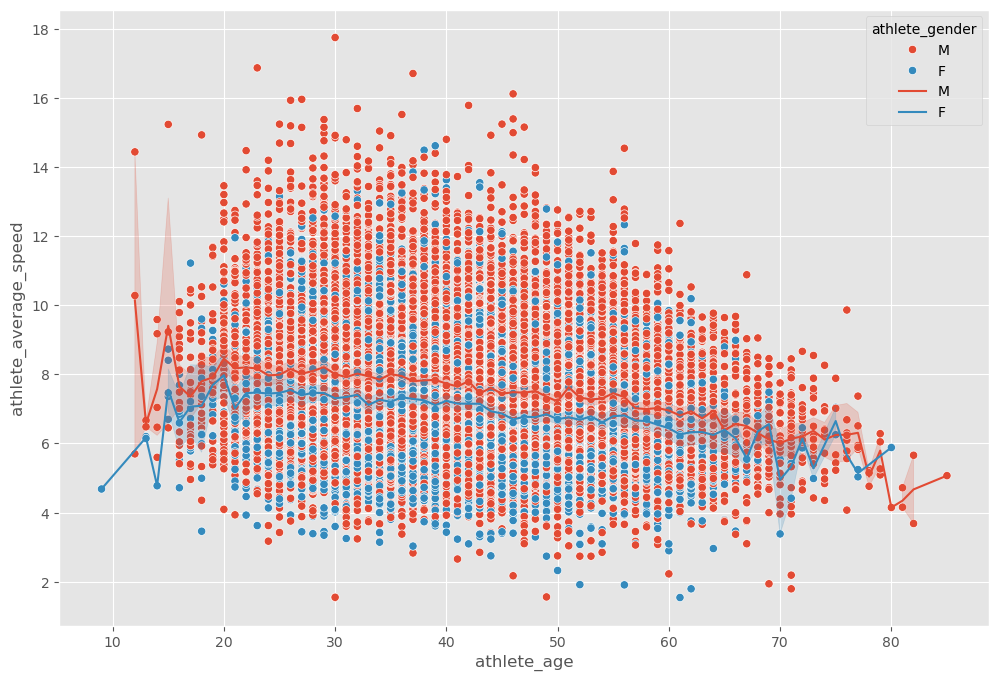

In [63]:
sns.scatterplot(data=df2, x='athlete_age', y='athlete_average_speed', hue='athlete_gender')
sns.lineplot(data=df2, x='athlete_age', y='athlete_average_speed', hue='athlete_gender')
plt.show()


## question: I want to find out from the data

In [ ]:
#race_day
#race_name
#race_number_of_finishers
#athlete_id
#athlete_gender
#athlete_age
#athlete_performance
#athlete_average_speed

### Difference in speed for the 50k,50mi male to female

In [64]:
df2.groupby(['race_length','athlete_gender'])['athlete_average_speed'].mean()

race_length  athlete_gender
50km         F                 7.083011
             M                 7.738985
50mi         F                 6.834371
             M                 7.257633
Name: athlete_average_speed, dtype: float64

### What age groups are the best in the 50m Race (20+ races min)

In [65]:
df2.query('race_length=="50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean','count']).sort_values('mean',ascending=False).query('count>19')

,mean,count
athlete_age,,
29,7.902252,135
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.540923,91
31,7.451638,138
38,7.430022,231
35,7.422359,195
36,7.403854,185


### What age groups are the worst in the 50m Race (20+ races min)(show 20)

In [66]:
df2.query('race_length=="50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean','count']).sort_values('mean',ascending=True).query('count>19')

,mean,count
athlete_age,,
60,6.261788,33
62,6.272730,37
61,6.358355,31
63,6.514806,31
58,6.582328,67
64,6.620727,22
50,6.671541,172
59,6.672072,83
48,6.696853,136


## Seasons for the data -> Slower in summer than winter?
1. spring 3-5
2. Summer 6-8
3. fall 9-11
4. winer 12-2

#### split between two decimals

In [71]:
df2['race_month']=df2['Event dates'].str.split('.').str.get(1).astype(int)


In [72]:
df2.head()

,year,Event dates,race_name,race_length,race_number_of_finishers,athlete_performance,Athlete year of birth,athlete_gender,athlete_average_speed,athlete_id,athlete_age,race_month
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,1991.0,M,15.158,71287,29,2
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,1981.0,M,12.369,629508,39,2
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,1999.0,M,12.099,64838,21,2
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,1983.0,M,11.449,704450,37,2
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,1977.0,M,11.212,810281,43,2


In [74]:
df2['race_season']=df2['race_month'].apply(lambda x: 'Winter' if x>11 else 'Fall' 
                                           if x>8 else 'Summer'
                                             if x>5 else 'Spring' 
                                             if x>2 else 'Winter'
                                             )

In [75]:
df2.head(25)

,year,Event dates,race_name,race_length,race_number_of_finishers,athlete_performance,Athlete year of birth,athlete_gender,athlete_average_speed,athlete_id,athlete_age,race_month,race_season
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,1991.0,M,15.158,71287,29,2,Winter
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,1981.0,M,12.369,629508,39,2,Winter
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,1999.0,M,12.099,64838,21,2,Winter
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,1983.0,M,11.449,704450,37,2,Winter
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,1977.0,M,11.212,810281,43,2,Winter
2539950,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:42:06 h,1985.0,F,10.635,810282,35,2,Winter
2539951,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:49:20 h,1961.0,M,10.369,11739,59,2,Winter
2539952,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:49:50 h,1970.0,M,10.351,80394,50,2,Winter
2539953,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:51:00 h,1975.0,F,10.309,140909,45,2,Winter
2539954,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,5:02:35 h,1979.0,M,9.915,753889,41,2,Winter


In [77]:
df2.groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)


,mean,count
race_season,,
Spring,7.684430,3294
Winter,7.518187,11595
Fall,7.406619,8315
Summer,6.869336,2653


### 50 miler only

In [79]:
df2.query('race_length == "50mi"').groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)


,mean,count
race_season,,
Fall,7.511585,1997
Spring,7.082557,836
Winter,7.048442,1977
Summer,6.505776,817
